# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


**Variables**:\
\
    **CLINICAL DATA** (one line per patient):\
        ID = unique identifier per patient\
        CENTER = clinical center\
        BM_BLAST = Bone marrow blasts in % (blasts are abnormal blood cells)\
        WBC = White Blood Cell count in Giga/L\
        ANC = Absolute Neutrophil count in Giga/L\
        MONOCYTES = Monocyte count in Giga/L\
        HB = Hemoglobin in g/dL\
        PLT = Platelets coutn in Giga/L\
        CYTOGENETICS = A description of the karyotype observed in the blood cells of the patients, measured by a cytogeneticist. Cytogenetics is the science of chromosomes. A karyotype is performed from the blood tumoral cells. The convention for notation is ISCN (https://en.wikipedia.org/wiki/International_System_for_Human_Cytogenomic_Nomenclature). Cytogenetic notation are: https://en.wikipedia.org/wiki/Cytogenetic_notation. Note that a karyotype can be normal or abnornal. The notation 46,XX denotes a normal karyotype in females (23 pairs of chromosomes including 2 chromosomes X) and 46,XY in males (23 pairs of chromosomes inclusing 1 chromosme X and 1 chromsome Y). A common abnormality in the blood cancerous cells might be for exemple a loss of chromosome 7 (monosomy 7, or -7), which is typically asssociated with higher risk disease\
        \
\
    **GENE MOLECULAR DATA** (one line per patient per somatic mutation). Mutations are detected from the sequencing of the blood tumoral cells. We call somatic (= acquired) mutations the mutations that are found in the tumoral cells but not in other cells of the body.\
        ID = unique identifier per patient\
        CHR START END = position of the mutation on the human genome\
        REF ALT = reference and alternate (=mutant) nucleotide\
        GENE = the affected gene\
        PROTEIN_CHANGE = the consequence of the mutation on the protei that is expressed by a given gene\
        EFFECT = a broad categorization of the mutation consequences on a given gene\
        VAF = Variant Allele Fraction = it represents the proportion of cells with the deleterious mutations\
\
**OUTCOME**:\
    OS_YEARS = Overall survival time in years\
    OS_STATUS = 1 (death) , 0 (alive at the last follow-up)\


In [2]:
import pandas as pd

# Load the data
print(os.getcwd())

# Clinical Data
clinical_df = pd.read_csv("/workspaces/PredictLeukemiaSurvival/ChallengeData/X_train/clinical_train.csv") # clinical_train
clinical_df_eval = pd.read_csv("/workspaces/PredictLeukemiaSurvival/ChallengeData/X_test/clinical_test.csv") # clinical_test

# Molecular Data
molecular_df = pd.read_csv("/workspaces/PredictLeukemiaSurvival/ChallengeData/X_train/molecular_train.csv") # molecular_train
molecular_df_eval = pd.read_csv("/workspaces/PredictLeukemiaSurvival/ChallengeData/X_test/molecular_test.csv") # molecular_test

# outcome (survival) data 
outcome_df = pd.read_csv("/workspaces/PredictLeukemiaSurvival/ChallengeData/target_train.csv") # target_train
outcome_df_test = pd.read_csv("/workspaces/PredictLeukemiaSurvival/ChallengeData/random_submission_FRacdcw_v9kP4pP.csv") # target_test

# Preview the data
clinical_df.head()

# Number of samples
num_samples_clinical = clinical_df.shape[0]
num_samples_molecular = molecular_df.shape[0]

# Number of features
num_features_clinical = clinical_df.shape[1]
num_features_molecular = molecular_df.shape[1]

# Display these dataset characteristics
print(f"Number of samples in the clinical data: {num_samples_clinical}")
print(f"Number of features in the clinical data: {num_features_clinical}")

# Display these dataset characteristics
print(f"Number of samples in the molecular data: {num_samples_molecular}")
print(f"Number of features in the molecular data: {num_features_molecular}")

# Display the first few rows of the dataframe to show the structure
print("\nExample data (clinical):")
print(clinical_df.head())

print("\nExample data (molecular):")
print(molecular_df.head())

print("\nExample data (outcome_df)")
print(outcome_df.head())



/workspaces/PredictLeukemiaSurvival/1_DatasetCharacteristics
Number of samples in the clinical data: 3323
Number of features in the clinical data: 9
Number of samples in the molecular data: 10935
Number of features in the molecular data: 11

Example data (clinical):
        ID CENTER  BM_BLAST    WBC  ANC  MONOCYTES    HB    PLT  \
0  P132697    MSK      14.0    2.8  0.2        0.7   7.6  119.0   
1  P132698    MSK       1.0    7.4  2.4        0.1  11.6   42.0   
2  P116889    MSK      15.0    3.7  2.1        0.1  14.2   81.0   
3  P132699    MSK       1.0    3.9  1.9        0.1   8.9   77.0   
4  P132700    MSK       6.0  128.0  9.7        0.9  11.1  195.0   

                          CYTOGENETICS  
0      46,xy,del(20)(q12)[2]/46,xy[18]  
1                                46,xx  
2   46,xy,t(3;3)(q25;q27)[8]/46,xy[12]  
3    46,xy,del(3)(q26q27)[15]/46,xy[5]  
4  46,xx,t(3;9)(p13;q22)[10]/46,xx[10]  

Example data (molecular):
        ID CHR        START          END                R

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [ ]:
# Check for missing values
# clinical
missing_values_clinical = clinical_df.isnull().sum()
missing_values_clinical_eval = clinical_df_eval.isnull().sum()

# molecular
missing_values_molecular = molecular_df.isnull().sum()
missing_values_molecular_eval = molecular_df_eval.isnull().sum()

# outcome
missing_values_outcome = outcome_df.isnull().sum()
missing_values_outcome_test = outcome_df_test.isnull().sum()

print(f'Missing values in the clinical data: \n{missing_values_clinical}\n')
print(f'Missing values in the molecular data: \n{missing_values_molecular}\n')
print(f'Missing values in the outcome data: \n{missing_values_outcome}\n')

print('\nMissing values in the evaluation datasets:\n')
print(f'Missing values in the clinical evaluation data: \n{missing_values_clinical_eval}\n')
print(f'Missing values in the molecular evaluation data: \n{missing_values_molecular_eval}\n')
print(f'Missing values in the outcome test data: \n{missing_values_outcome_test}\n')

<Figure size 1200x800 with 0 Axes>

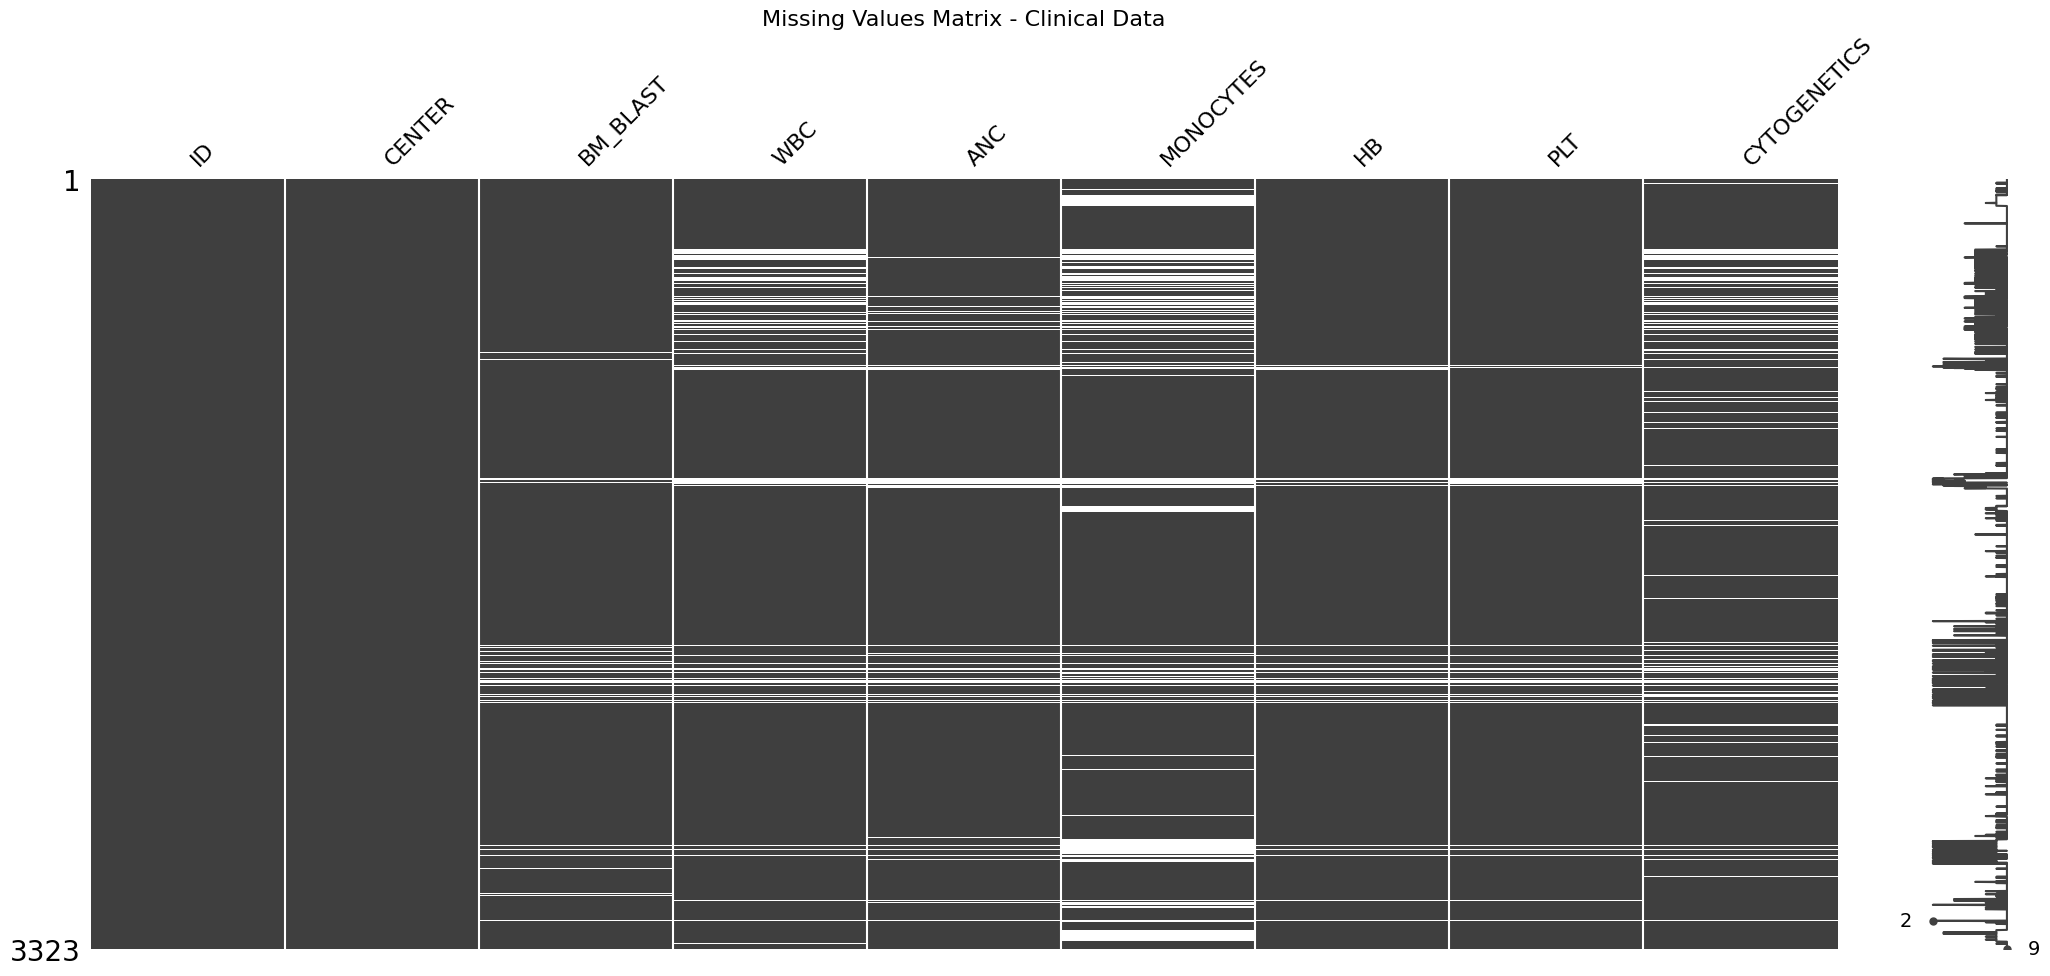

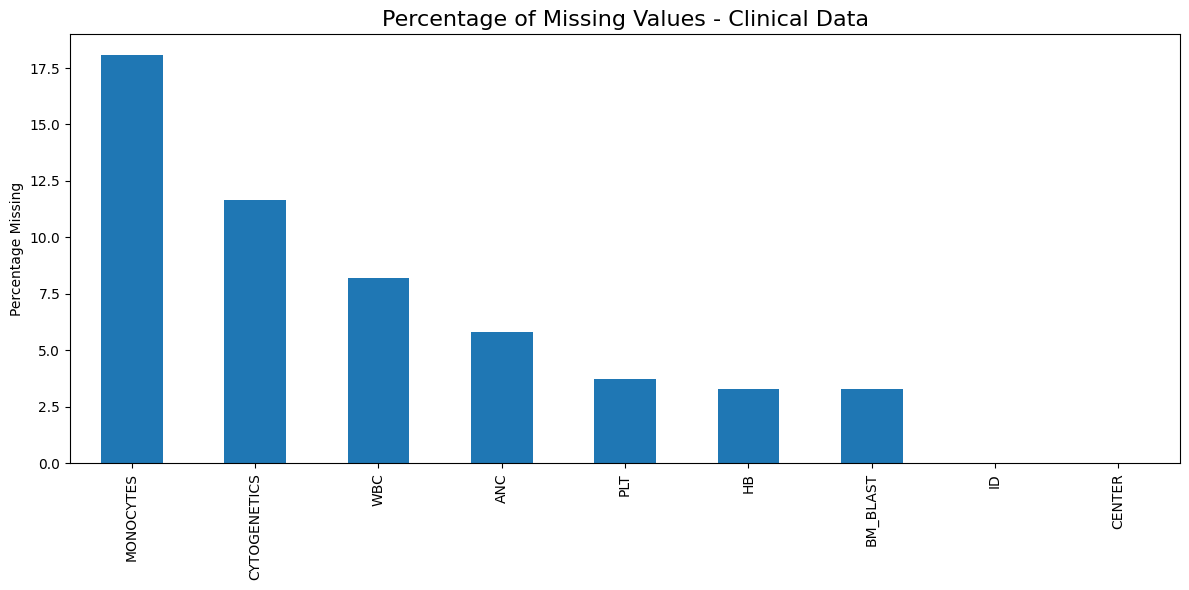


Clinical Data Missing Percentage:
MONOCYTES       18.086067
CYTOGENETICS    11.646103
WBC              8.185375
ANC              5.808005
PLT              3.731568
HB               3.310262
BM_BLAST         3.280169
ID               0.000000
CENTER           0.000000
dtype: float64


<Figure size 1200x800 with 0 Axes>

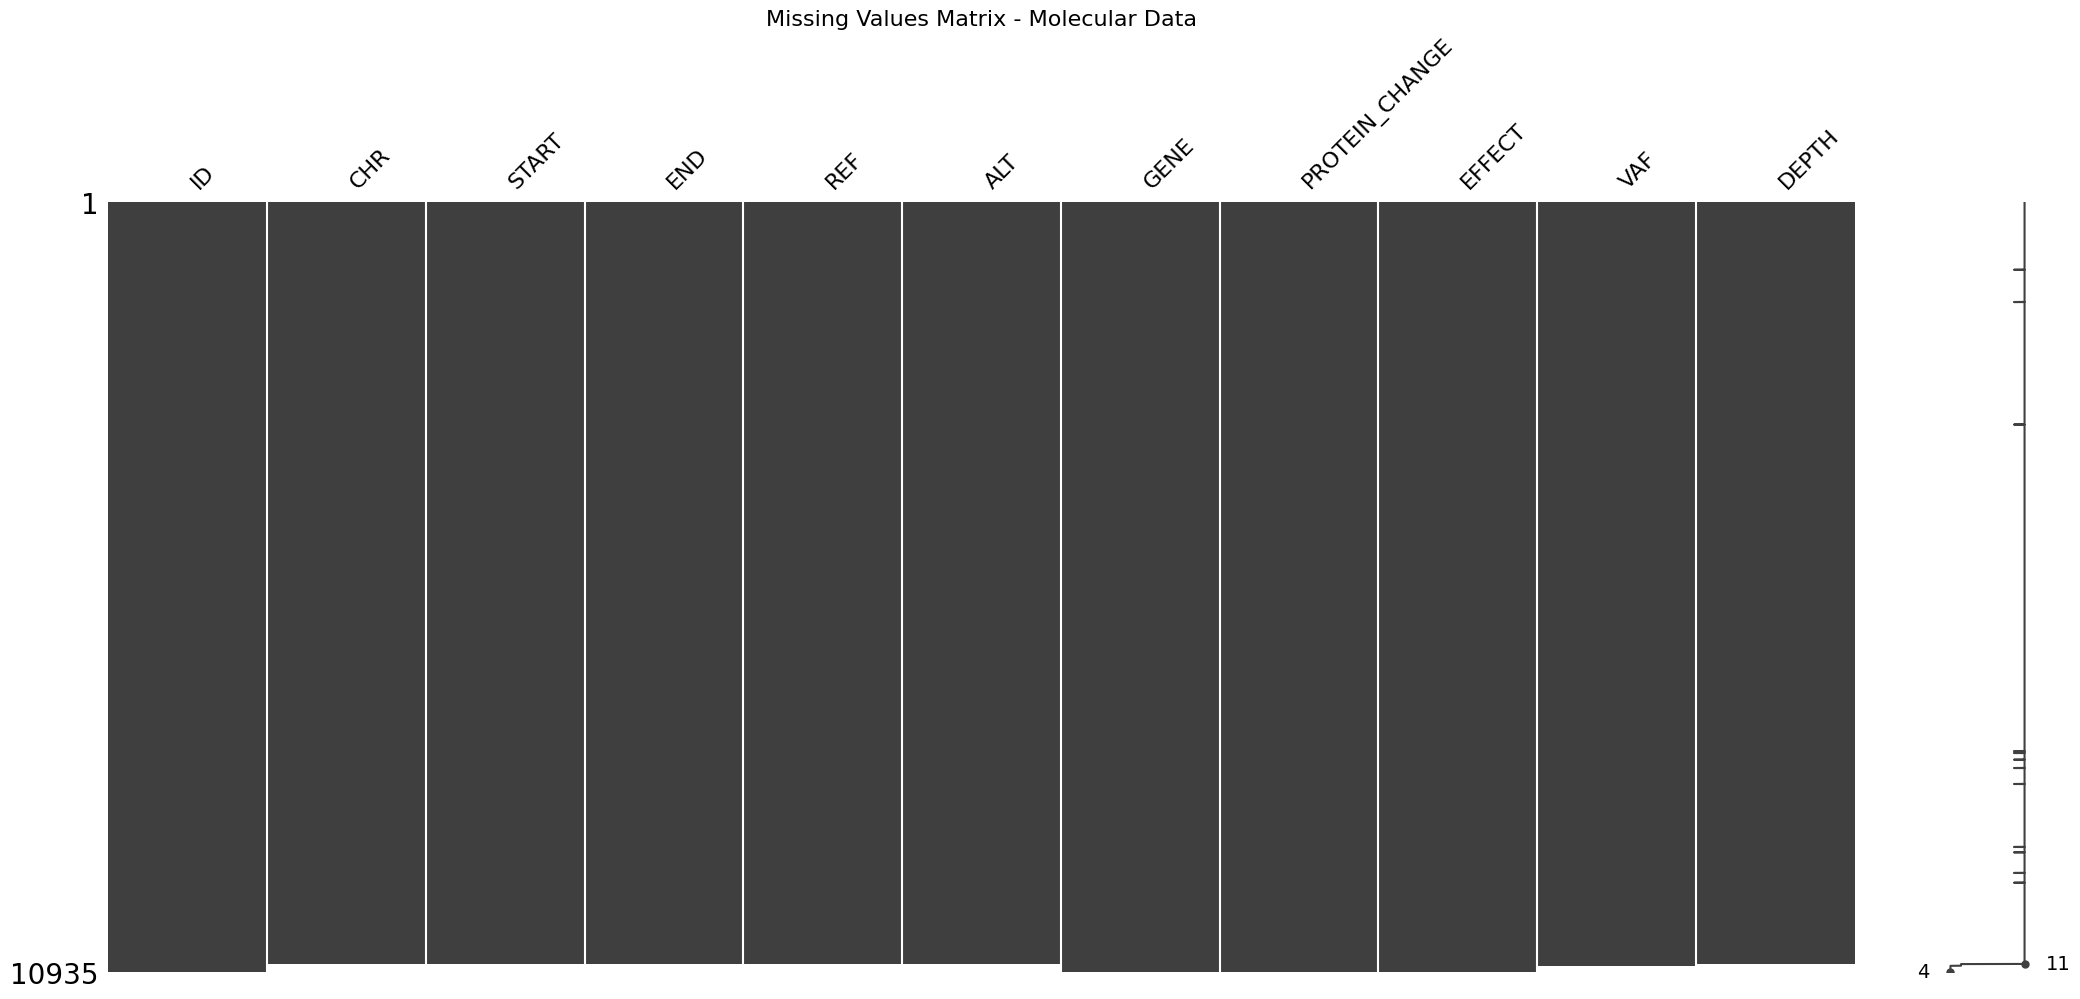

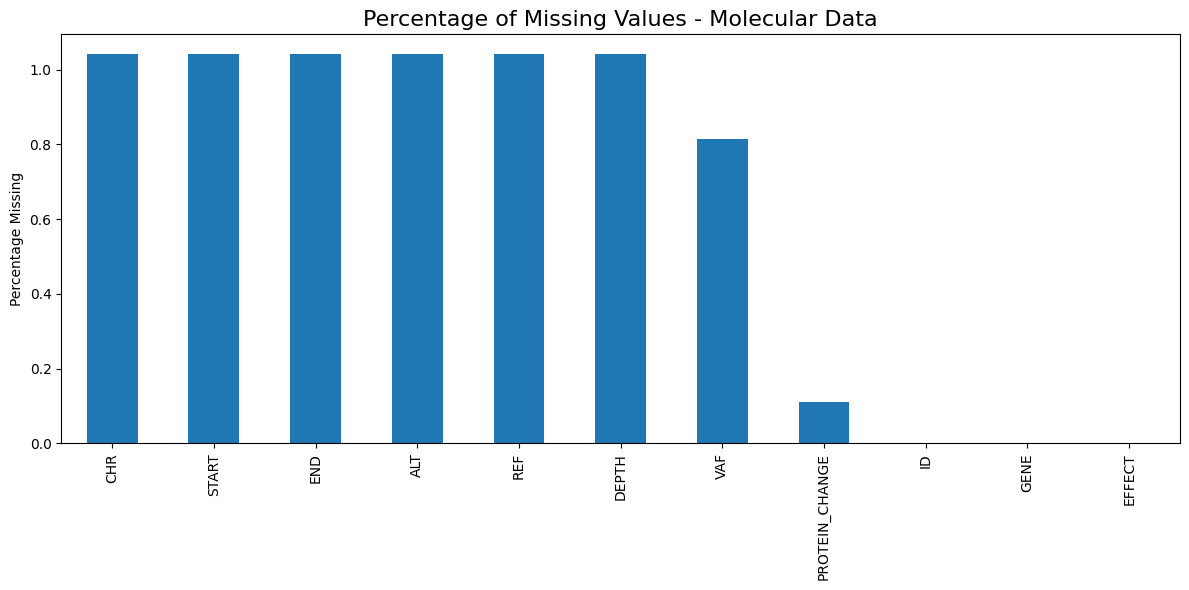


Molecular Data Missing Percentage:
CHR               1.042524
START             1.042524
END               1.042524
ALT               1.042524
REF               1.042524
DEPTH             1.042524
VAF               0.813900
PROTEIN_CHANGE    0.109739
ID                0.000000
GENE              0.000000
EFFECT            0.000000
dtype: float64


<Figure size 1200x800 with 0 Axes>

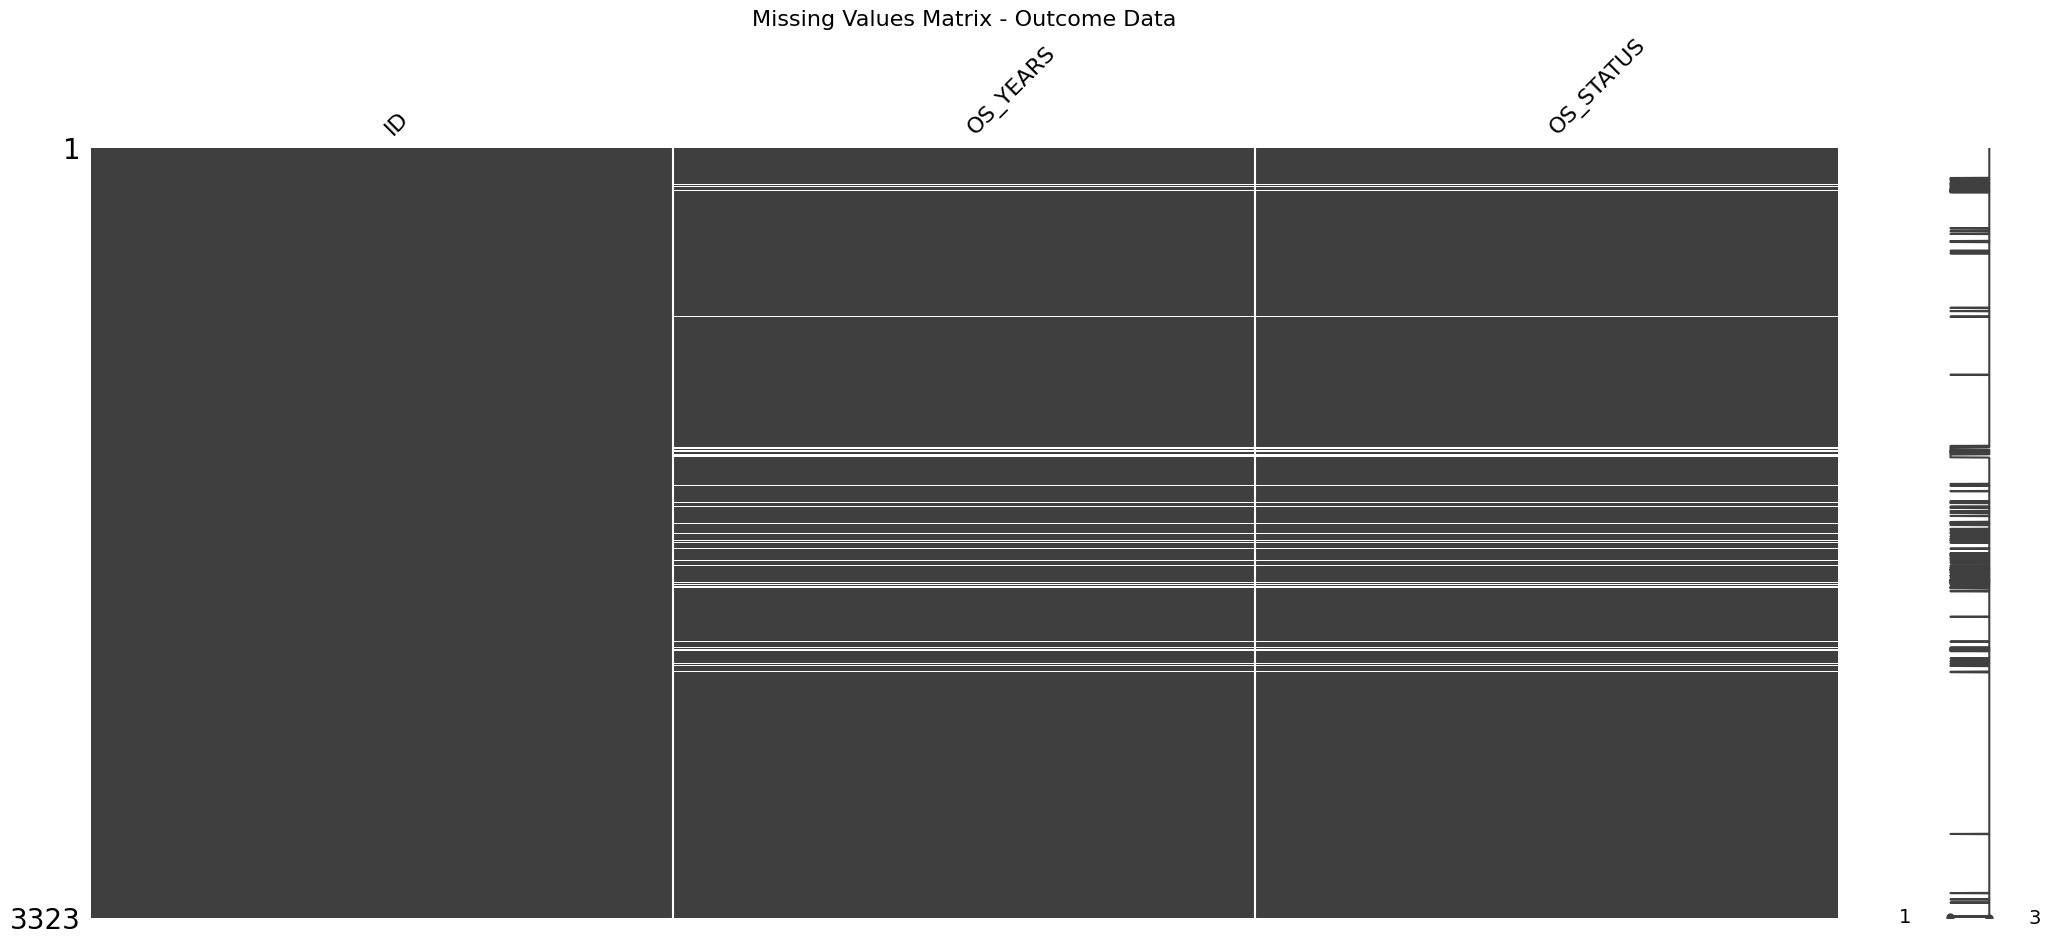

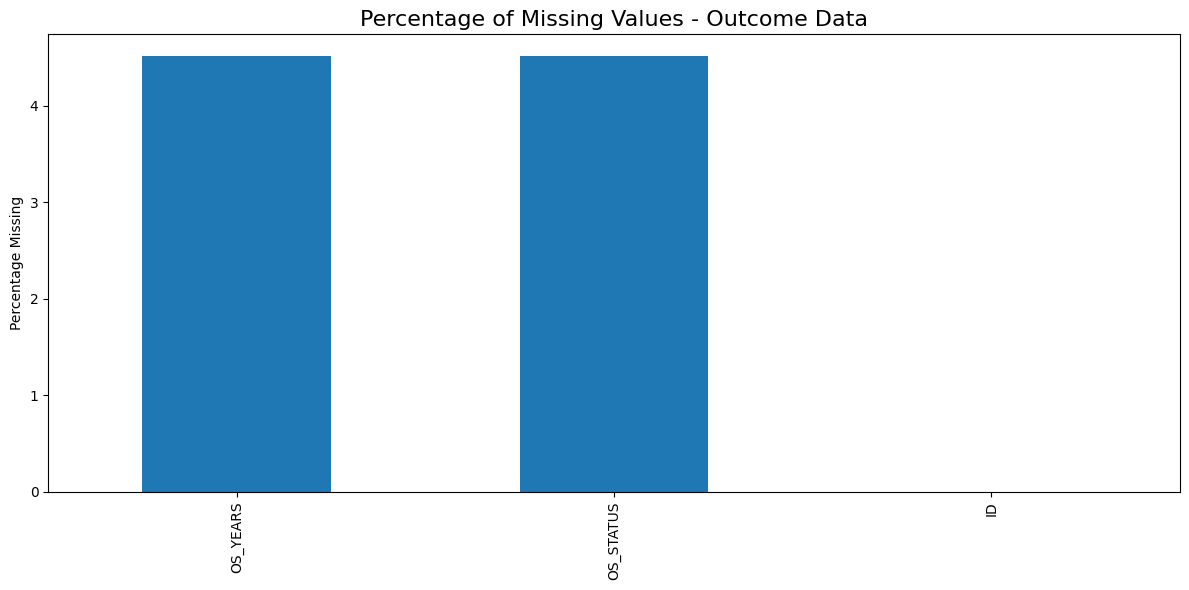


Outcome Data Missing Percentage:
OS_YEARS     4.513993
OS_STATUS    4.513993
ID           0.000000
dtype: float64


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


# Analyze missing data patterns visually
def analyze_missing_data(dataframe, title):
    """Visualize missing data patterns in a dataframe"""
    plt.figure(figsize=(12, 8))
    
    # Plot missing values matrix
    msno.matrix(dataframe)
    plt.title(f"Missing Values Matrix - {title}", fontsize=16)
    plt.tight_layout()
    plt.show()
  
    # Calculate and display percentage of missing values
    missing_percentage = dataframe.isna().mean().sort_values(ascending=False) * 100
    plt.figure(figsize=(12, 6))
    missing_percentage.plot(kind='bar')
    plt.title(f"Percentage of Missing Values - {title}", fontsize=16)
    plt.ylabel('Percentage Missing')
    plt.tight_layout()
    plt.show()
    
    return missing_percentage

# Analyze missing data in clinical dataset
clinical_missing = analyze_missing_data(clinical_df, "Clinical Data")
print("\nClinical Data Missing Percentage:")
print(clinical_missing)

# Analyze missing data in molecular dataset (filtering to keep it manageable)
molecular_missing = analyze_missing_data(molecular_df, "Molecular Data")
print("\nMolecular Data Missing Percentage:")
print(molecular_missing)

# Analyze missing data in outcome dataset
outcome_missing = analyze_missing_data(outcome_df, "Outcome Data")
print("\nOutcome Data Missing Percentage:")
print(outcome_missing)


In [15]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

def impute_dataset(df, dataset_name, n_neighbors=5):
    """
    Imputes missing values in a dataframe using improved KNN imputation for numeric data
    and mode imputation for categorical data.
    
    Parameters:
    - df: DataFrame to impute
    - dataset_name: Name for logging purposes
    - n_neighbors: Number of neighbors for KNN imputation
    """
    print(f"\nImputing {dataset_name} dataset...")
    result_df = df.copy()
    
    # Get columns with missing values
    cols_with_missing = df.columns[df.isnull().any()].tolist()
    
    if not cols_with_missing:
        print(f"No missing values in {dataset_name} dataset.")
        return result_df
    
    print(f"Columns with missing values: {cols_with_missing}")
    
    # Separate numeric and categorical columns
    numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    categorical_cols = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col])]
    
    # Handle numeric columns with KNN imputation
    numeric_cols_with_missing = [col for col in cols_with_missing if col in numeric_cols]
    
    if numeric_cols_with_missing and len(numeric_cols) >= 2:
        print(f"Applying KNN imputation to numeric columns: {numeric_cols_with_missing}")
        
        # Extract numeric data
        numeric_data = df[numeric_cols].copy()
        
        # Check if we have enough complete cases for reliable KNN
        complete_cases = numeric_data.dropna().shape[0]
        total_cases = numeric_data.shape[0]
        
        if complete_cases >= n_neighbors and complete_cases >= 0.3 * total_cases:
            # Scale the data for better KNN performance
            scaler = StandardScaler()
            
            # Fit scaler on complete cases only to avoid bias
            complete_data = numeric_data.dropna()
            if len(complete_data) > 0:
                scaler.fit(complete_data)
                
                # Transform all data (including missing values)
                # StandardScaler handles missing values by ignoring them during transform
                try:
                    scaled_data = pd.DataFrame(
                        scaler.transform(numeric_data),
                        columns=numeric_cols,
                        index=numeric_data.index
                    )
                except:
                    # If scaling fails due to missing values, use original data
                    scaled_data = numeric_data.copy()
                    print("  - Warning: Scaling failed, using unscaled data for KNN")
                
                # Apply KNN imputation
                imputer = KNNImputer(n_neighbors=min(n_neighbors, complete_cases))
                imputed_scaled = imputer.fit_transform(scaled_data)
                
                # Transform back to original scale
                try:
                    imputed_data = pd.DataFrame(
                        scaler.inverse_transform(imputed_scaled),
                        columns=numeric_cols,
                        index=numeric_data.index
                    )
                except:
                    # If inverse transform fails, use the scaled imputed data
                    imputed_data = pd.DataFrame(
                        imputed_scaled,
                        columns=numeric_cols,
                        index=numeric_data.index
                    )
                    print("  - Warning: Inverse scaling failed, using scaled values")
                
                # Update only the columns that had missing values
                for col in numeric_cols_with_missing:
                    result_df[col] = imputed_data[col]
                    print(f"  - Imputed {col} using scaled KNN (k={min(n_neighbors, complete_cases)})")
            else:
                # No complete cases, fall back to median
                for col in numeric_cols_with_missing:
                    result_df[col] = df[col].fillna(df[col].median())
                    print(f"  - Imputed {col} using median (no complete cases for KNN)")
        else:
            print(f"  - Insufficient complete cases ({complete_cases}/{total_cases}) for reliable KNN")
            # Fall back to median imputation for numeric columns
            for col in numeric_cols_with_missing:
                result_df[col] = df[col].fillna(df[col].median())
                print(f"  - Imputed {col} using median")
    elif numeric_cols_with_missing:
        # Not enough numeric columns for KNN, use median
        for col in numeric_cols_with_missing:
            result_df[col] = df[col].fillna(df[col].median())
            print(f"  - Imputed {col} using median (insufficient numeric features)")
    
    # Handle categorical columns with mode imputation
    categorical_cols_with_missing = [col for col in cols_with_missing if col in categorical_cols]
    
    for col in categorical_cols_with_missing:
        if df[col].nunique() > 0:
            mode_value = df[col].mode()
            if len(mode_value) > 0:
                result_df[col] = df[col].fillna(mode_value[0])
                print(f"  - Imputed {col} using mode value: '{mode_value[0]}'")
            else:
                result_df[col] = df[col].fillna('Unknown')
                print(f"  - Imputed {col} using 'Unknown' (no mode available)")
        else:
            result_df[col] = df[col].fillna('Unknown')
            print(f"  - Imputed {col} using 'Unknown' (all missing)")
    
    # Verify imputation worked
    remaining_missing = result_df.isnull().sum()
    if remaining_missing.sum() > 0:
        print(f"WARNING: {remaining_missing.sum()} values still missing after imputation:")
        print(remaining_missing[remaining_missing > 0])
    else:
        print(f"Success! All missing values imputed in {dataset_name} dataset.")
    
    return result_df

# Start with original missing values check
print("Original missing values check:")
print("\nClinical data missing values:")
print(clinical_df.isnull().sum()[clinical_df.isnull().sum() > 0])

print("\nMolecular data missing values:")
print(molecular_df.isnull().sum()[molecular_df.isnull().sum() > 0])

print("\nOutcome data missing values:")
print(outcome_df.isnull().sum()[outcome_df.isnull().sum() > 0])

# Impute the datasets
clinical_imputed = impute_dataset(clinical_df, "clinical")
molecular_imputed = impute_dataset(molecular_df, "molecular")

# Impute the evaluation datasets
clinical_eval_imputed = impute_dataset(clinical_df_eval, "clinical_eval")
molecular_eval_imputed = impute_dataset(molecular_df_eval, "molecular_eval")

Original missing values check:

Clinical data missing values:
BM_BLAST        109
WBC             272
ANC             193
MONOCYTES       601
HB              110
PLT             124
CYTOGENETICS    387
dtype: int64

Molecular data missing values:
CHR               114
START             114
END               114
REF               114
ALT               114
PROTEIN_CHANGE     12
VAF                89
DEPTH             114
dtype: int64

Outcome data missing values:
OS_YEARS     150
OS_STATUS    150
dtype: int64

Imputing clinical dataset...
Columns with missing values: ['BM_BLAST', 'WBC', 'ANC', 'MONOCYTES', 'HB', 'PLT', 'CYTOGENETICS']
Applying KNN imputation to numeric columns: ['BM_BLAST', 'WBC', 'ANC', 'MONOCYTES', 'HB', 'PLT']
  - Imputed BM_BLAST using scaled KNN (k=5)
  - Imputed WBC using scaled KNN (k=5)
  - Imputed ANC using scaled KNN (k=5)
  - Imputed MONOCYTES using scaled KNN (k=5)
  - Imputed HB using scaled KNN (k=5)
  - Imputed PLT using scaled KNN (k=5)
  - Imputed CYTOGE

In [16]:
# Step 1: Identify subjects with missing outcome data
incomplete_ids = outcome_df[
    outcome_df[['OS_YEARS', 'OS_STATUS']].isna().any(axis=1)
].index

print(f" Found {len(incomplete_ids)} subjects with missing OS_YEARS or OS_STATUS.")

# Step 2: Drop those subjects from clinical and molecular data (if they exist there)
clinical_imputed_filtered = clinical_imputed.drop(index=incomplete_ids, errors='ignore')
molecular_imputed_filtered = molecular_imputed.drop(index=incomplete_ids, errors='ignore')

clinical_eval_imputed_filtered = clinical_eval_imputed.drop(index=incomplete_ids, errors='ignore')
molecular_eval_imputed_filtered = molecular_eval_imputed.drop(index=incomplete_ids, errors='ignore')

# Step 3: Also drop them from the outcome data
outcome_filtered = outcome_df.drop(index=incomplete_ids, errors='ignore')


 Found 150 subjects with missing OS_YEARS or OS_STATUS.


In [17]:
# Save imputed datasets to CSV files
clinical_imputed_filtered.to_csv("imputed_clinical.csv", index=False)
molecular_imputed_filtered.to_csv("imputed_molecular.csv", index=False)
outcome_filtered.to_csv("imputed_outcome.csv", index=False)
clinical_eval_imputed_filtered.to_csv('imputed_clinical_eval.csv', index=False)
molecular_eval_imputed_filtered.to_csv('imputed_molecular_eval.csv', index=False)

# Final verification
print("\n=== VERIFICATION ===")
print("\nClinical data - remaining missing values:")
print(clinical_imputed_filtered.isnull().sum()[clinical_imputed_filtered.isnull().sum() > 0])

print("\nMolecular data - remaining missing values:")
print(molecular_imputed_filtered.isnull().sum()[molecular_imputed_filtered.isnull().sum() > 0])

print("\nOutcome data - remaining missing values:")
print(outcome_filtered.isnull().sum()[outcome_filtered.isnull().sum() > 0])

print("\nClinical evaluation data - remaining missing values:")
print(clinical_eval_imputed_filtered.isnull().sum()[clinical_eval_imputed_filtered.isnull().sum() > 0])

print("\nMolecular evaluation data - remaining missing values:")
print(molecular_eval_imputed_filtered.isnull().sum()[molecular_eval_imputed_filtered.isnull().sum() > 0])


=== VERIFICATION ===

Clinical data - remaining missing values:
Series([], dtype: int64)

Molecular data - remaining missing values:
Series([], dtype: int64)

Outcome data - remaining missing values:
Series([], dtype: int64)

Clinical evaluation data - remaining missing values:
Series([], dtype: int64)

Molecular evaluation data - remaining missing values:
Series([], dtype: int64)


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


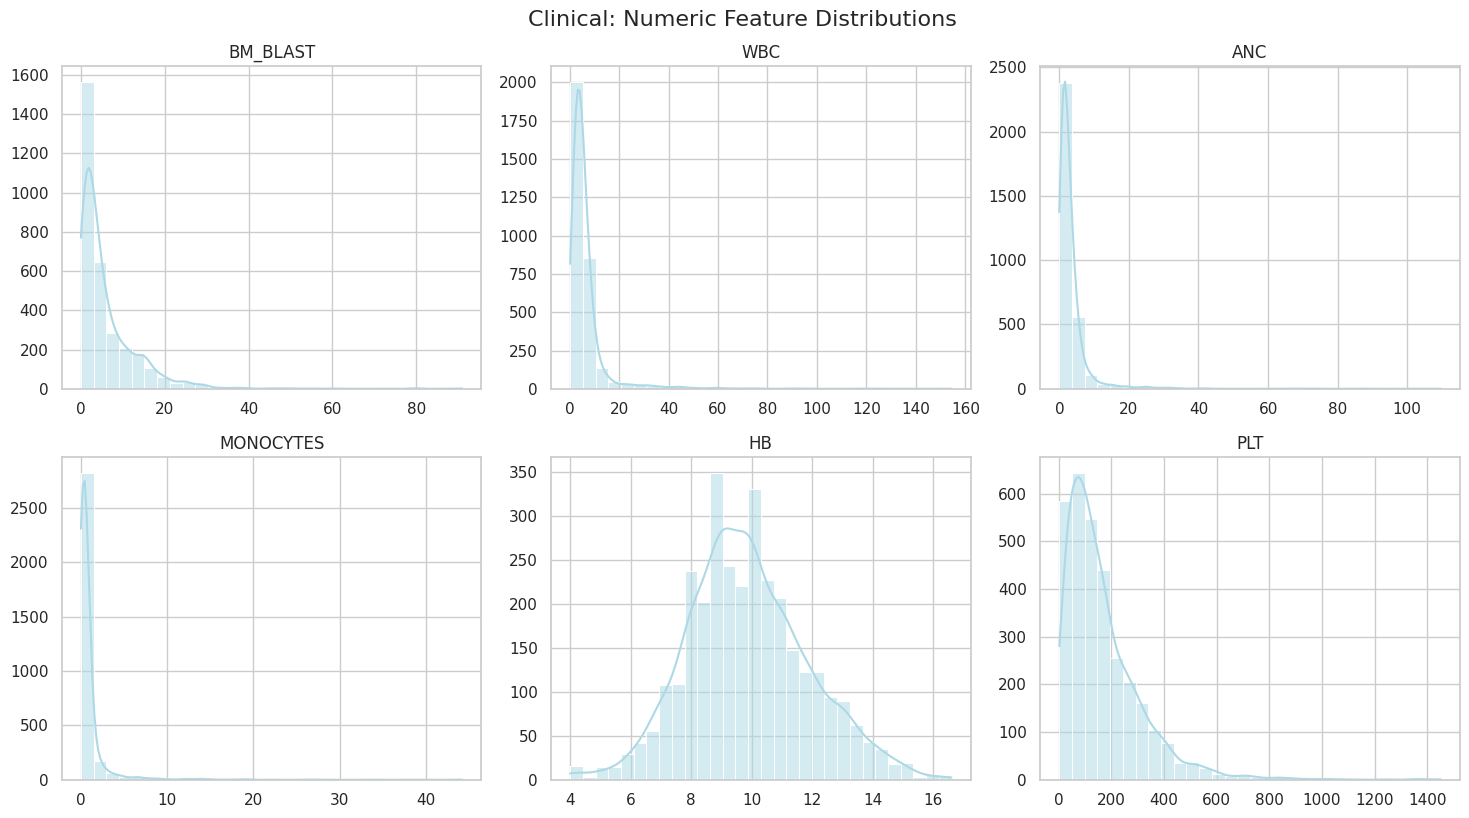

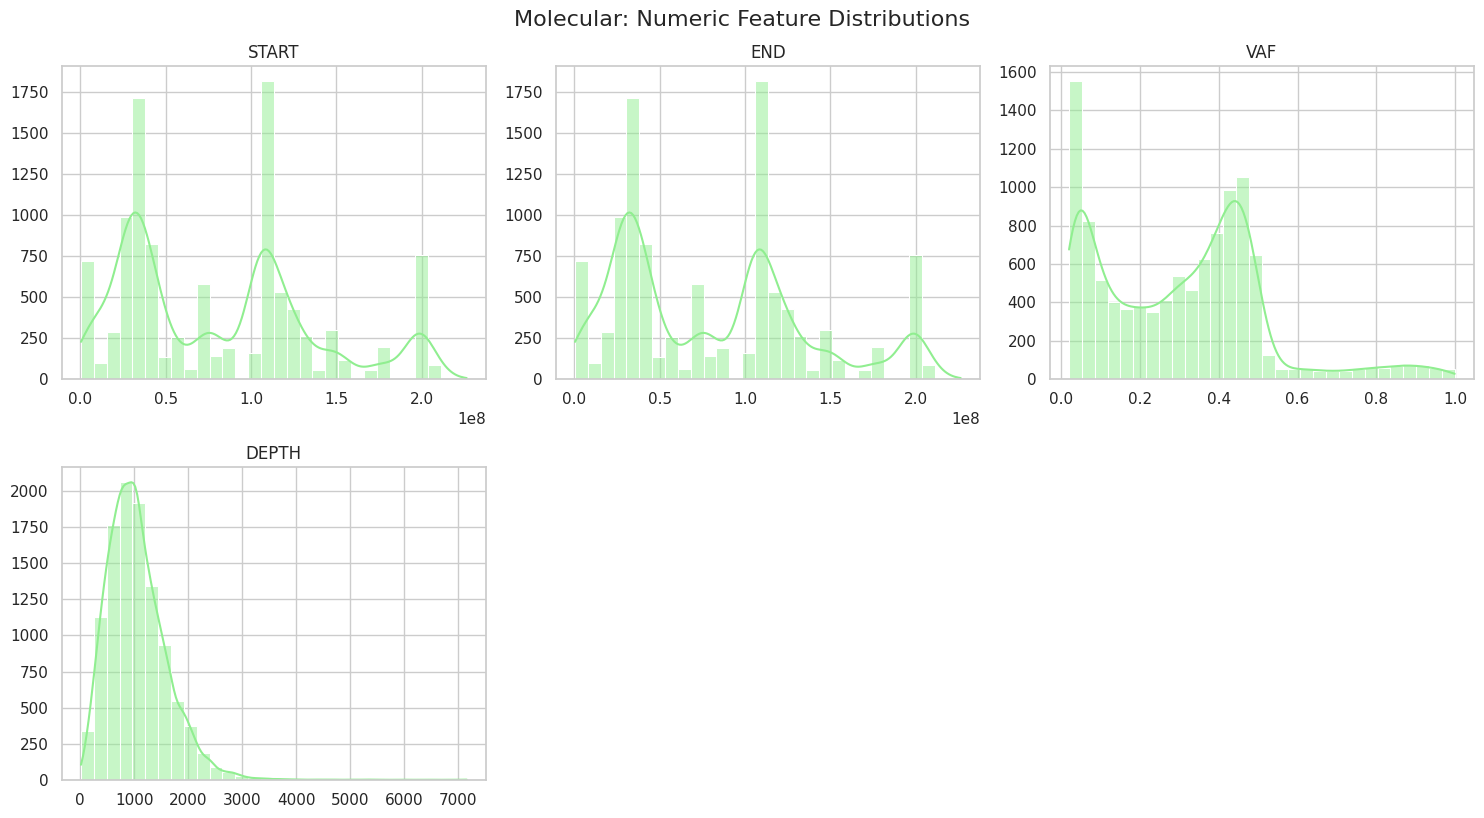

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns
numeric_cols_clinical = clinical_imputed_filtered.select_dtypes(include='number').columns
numeric_cols_molecular = molecular_imputed_filtered.select_dtypes(include='number').columns

def plot_histogram_subplots(numeric_cols, data, suptitle, color):
    # Determine subplot grid size
    n_cols = 3
    n_rows = math.ceil(len(numeric_cols) / n_cols)

    # Set style
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
    axes = axes.flatten()

    # Plot histograms
    for i, col in enumerate(numeric_cols):
        sns.histplot(data[col], kde=True, bins=30, color=color, ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle(f'{suptitle}: Numeric Feature Distributions', fontsize=16, y=1.02)
    plt.show()

plot_histogram_subplots(numeric_cols_clinical, clinical_imputed_filtered, 'Clinical', color ='lightblue')
plot_histogram_subplots(numeric_cols_molecular, molecular_imputed_filtered, 'Molecular', color='lightgreen')

## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


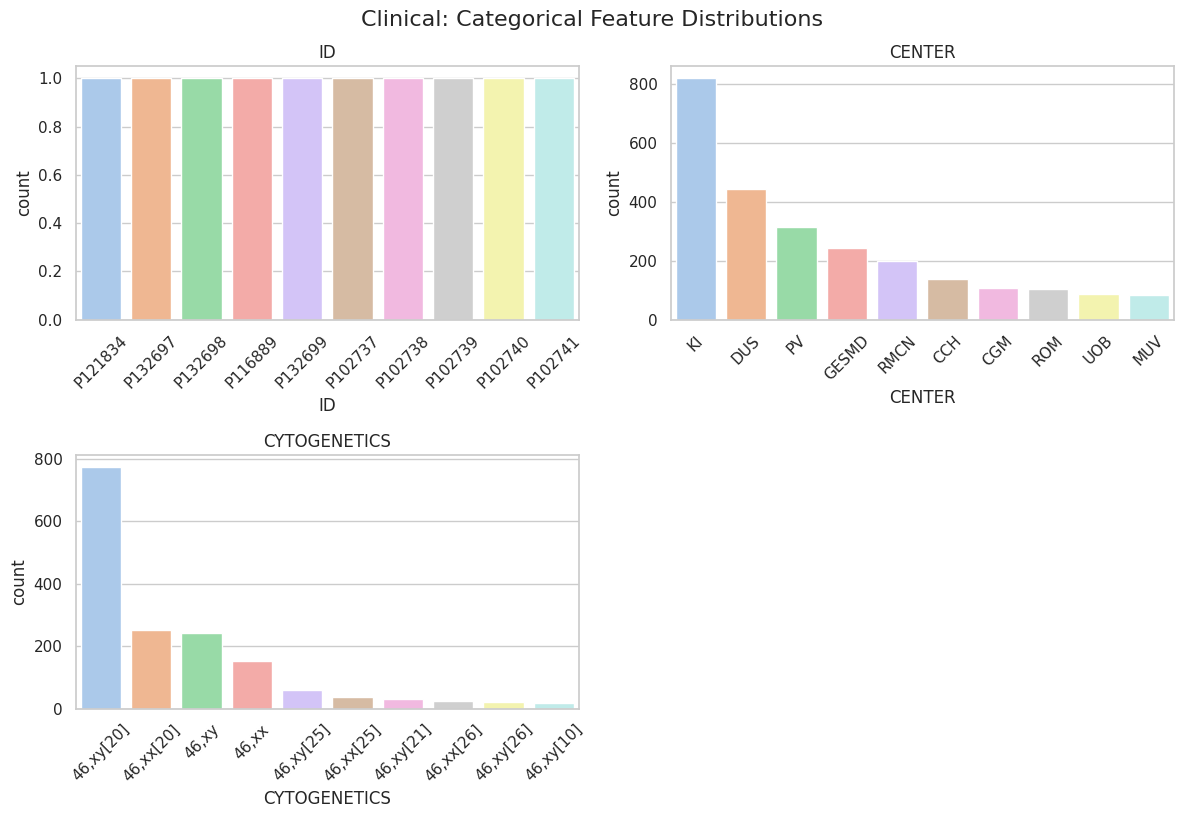

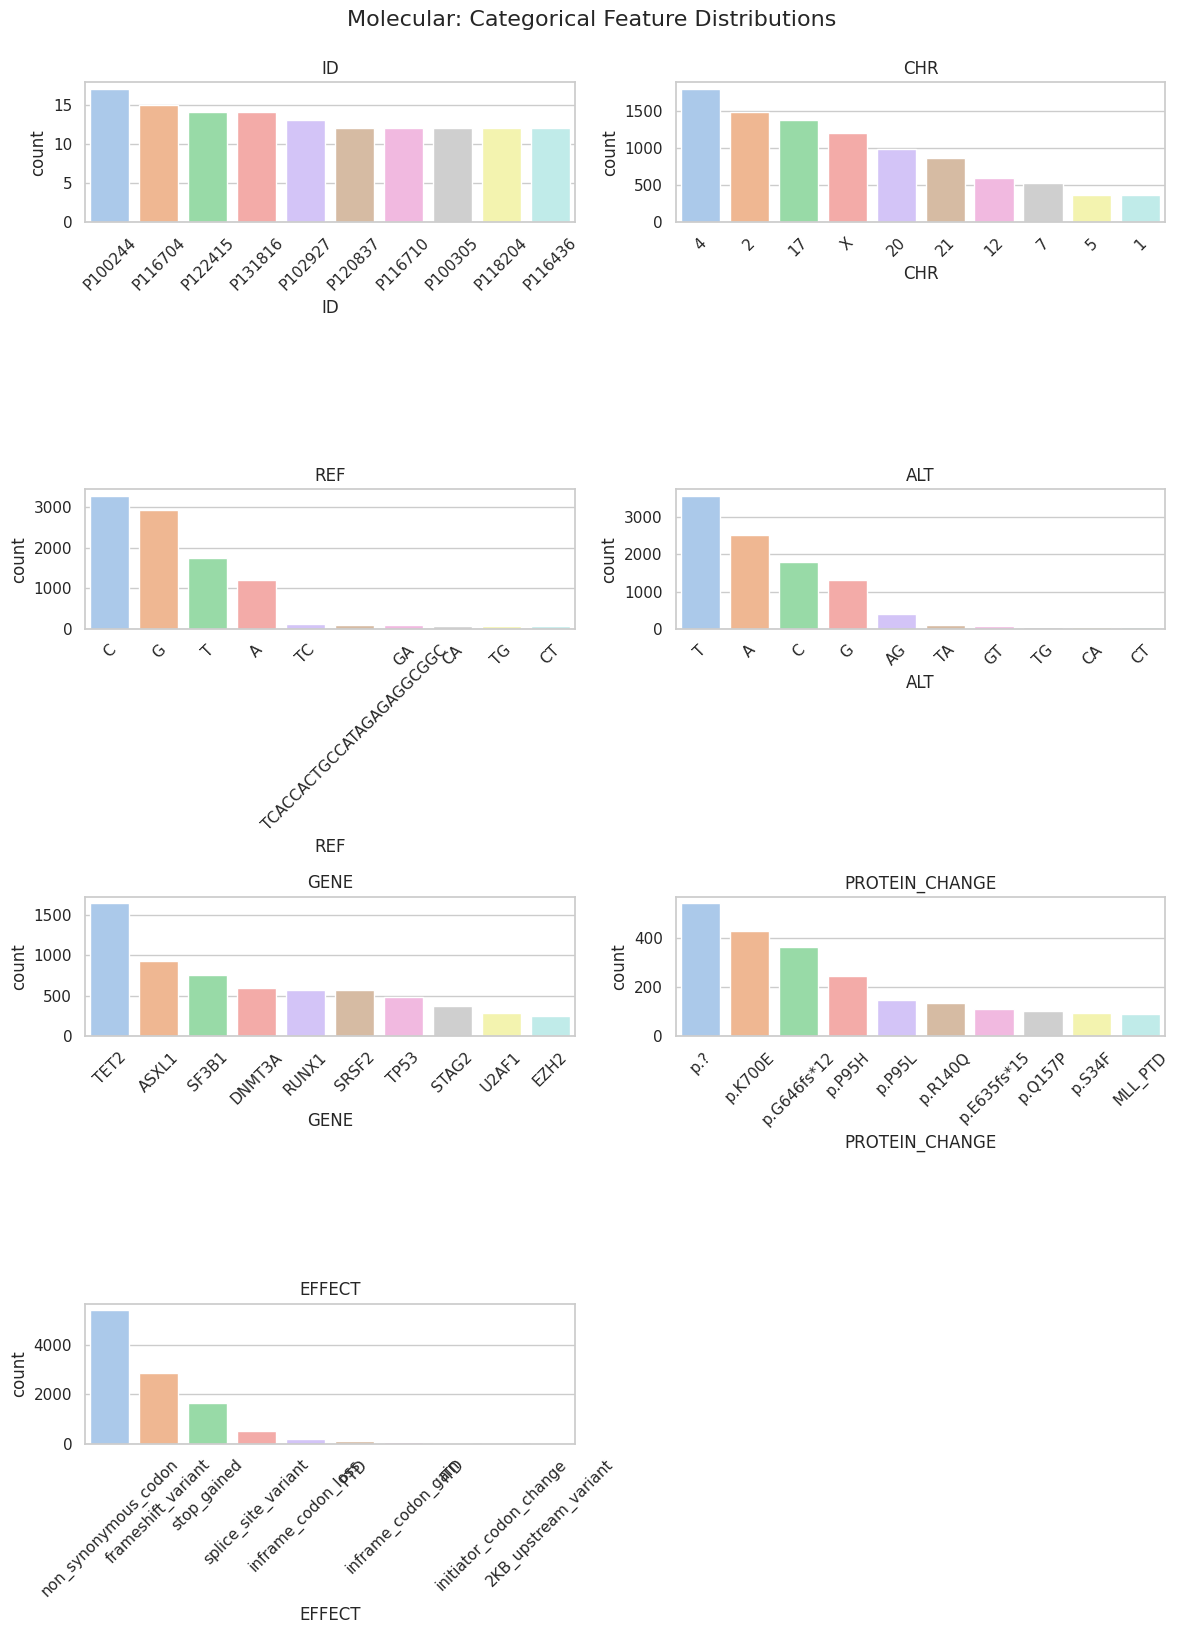

In [19]:
# Define function to plot all categorical columns in subplots
def plot_categorical_distributions(df, title_prefix):
    cat_cols = df.select_dtypes(include='object').columns
    n_cols = 2
    n_rows = math.ceil(len(cat_cols) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        sns.countplot(x=col, data=df, palette='pastel', ax=axes[i], order=df[col].value_counts().index[:10])
        axes[i].set_title(f'{col}')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle(f'{title_prefix}: Categorical Feature Distributions', fontsize=16, y=1.02)
    plt.show()

# Plot clinical categorical features
plot_categorical_distributions(clinical_imputed_filtered, title_prefix='Clinical')

# Plot molecular categorical features
plot_categorical_distributions(molecular_imputed_filtered, title_prefix='Molecular')


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


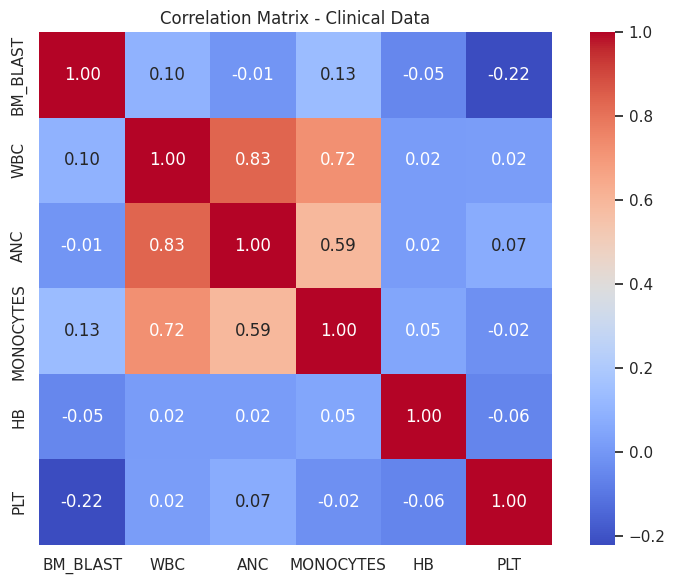

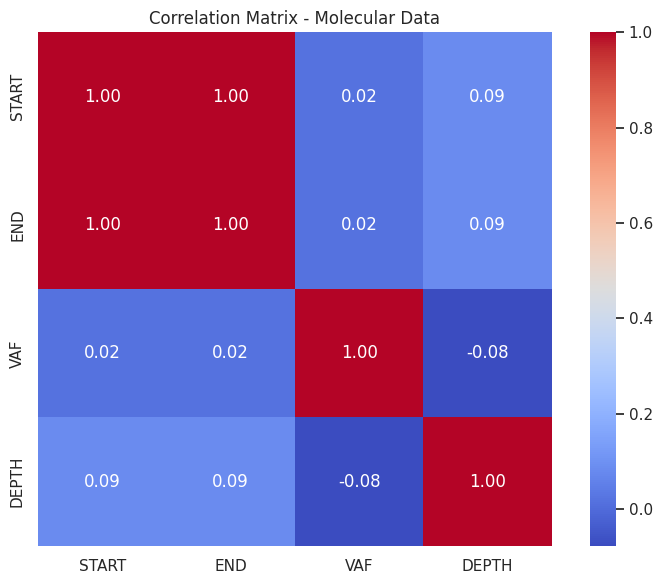

In [20]:
# Compute correlation matrix
corr = clinical_imputed_filtered[numeric_cols_clinical].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix - Clinical Data')
plt.tight_layout()
plt.show()

corr = molecular_imputed_filtered[numeric_cols_molecular].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix - Molecular Data')
plt.tight_layout()
plt.show()

